In [19]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import glob


In [20]:
file = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/Non-AMD/" 

img_file = list(glob.glob1(file, "*.jpg"))
img = []
for i in img_file:
    img.append(i)

data = []
for i in img:
    image_path = file + i
    gray=Image.open(image_path)
    gray_resiz = gray.resize((256, 256))
    arr_gray = np.array(gray_resiz)
    data.append(arr_gray)


In [21]:
d = np.array(data)


In [22]:
d.shape

(311, 256, 256, 3)

In [23]:
file1 = "C://Users/16823/Desktop/Research Papers/Retinal_Datasets/iChallenge-AMD-Training400/AMD/" 

img_file1 = list(glob.glob1(file1, "*.jpg"))
img1 = []
for i in img_file1:
    img1.append(i)

data1 = []
for i in img1:
    image_path1 = file1 + i
    gray1=Image.open(image_path1)
    gray_resiz1 = gray1.resize((256, 256))
    arr_gray1 = np.array(gray_resiz1)
    data1.append(arr_gray1)


In [24]:
d1 = np.array(data1)


In [25]:
d1.shape

(89, 256, 256, 3)

In [26]:
df = np.concatenate((d, d1), axis = 0)
df.shape

(400, 256, 256, 3)

In [27]:
d_label = [0]*311
d1_label = [1]*89

In [28]:
y = np.concatenate([d_label, d1_label])


In [29]:
import keras
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import np_utils

In [30]:
# # #Spliting the data in 80:20 training to testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 0)

# x_train = pd.concat([df.iloc[:135, :100], df.iloc[168:303,:100]], axis = 0, ignore_index = True).values
# x_test =pd.concat([df.iloc[135:168, :100], df.iloc[303:,:100]], axis = 0, ignore_index = True).values
# y_train = pd.concat([df.iloc[:135, 100], df.iloc[168:303,100]], axis = 0, ignore_index = True).values
# y_test = pd.concat([df.iloc[135:168, 100], df.iloc[303:, 100]], axis = 0, ignore_index = True).values


In [31]:
import keras
y_train = keras.utils.np_utils.to_categorical(y_train,2)
y_test = keras.utils.np_utils.to_categorical(y_test,2)


In [32]:
y_train.shape

(320, 2)

In [33]:
# Models 
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

from tensorflow.keras.applications import EfficientNetB2
model_cnn = tf.keras.models.Sequential([
   EfficientNetB2(input_shape=(256,256,3), include_top=False),
])
for layer in model_cnn.layers:
  layer.trainable = False

model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPooling2D(2,2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(2, activation='sigmoid'))

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 8, 8, 1408)       7768569   
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 64)          811072    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 576)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                36928     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                      

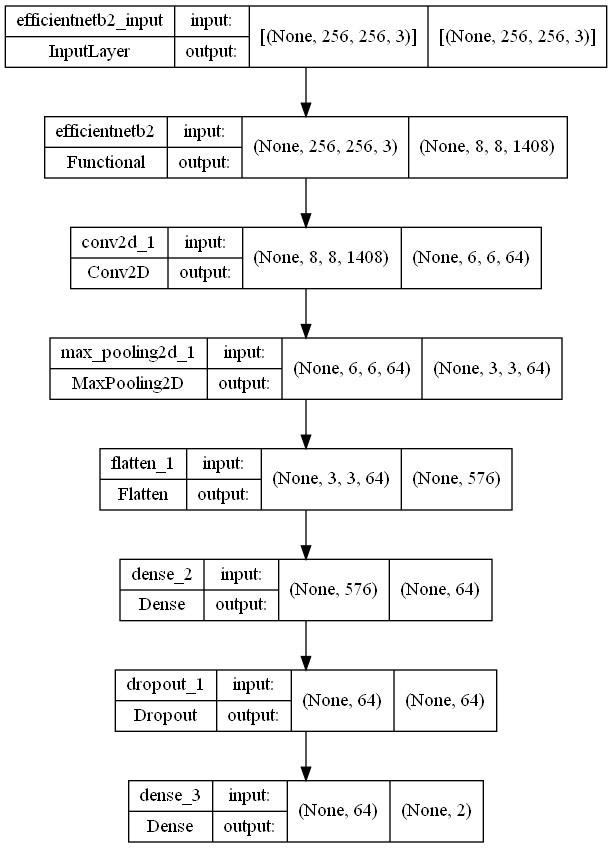

In [34]:
from tensorflow.keras.utils import plot_model

#model = Model(inputs=[mlp.input, model_cnn.input], outputs=x)

plot_model(model_cnn, "multi_input_and_output_model.png", show_shapes=True)

In [35]:

loss = keras.losses.BinaryCrossentropy()
model_cnn.compile(loss= loss, optimizer= 'adam', metrics=['accuracy','Precision','Recall','AUC'])
# train the model
print("[INFO] training model...")

h = model_cnn.fit(x=x_train, y=y_train, epochs=50, batch_size=32)

[INFO] training model...
Epoch 1/50
10/10 [==============================] - 29s 2s/step - loss: 0.7771 - accuracy: 0.7531 - precision: 0.7525 - recall: 0.7125 - auc: 0.7961
Epoch 2/50
10/10 [==============================] - 21s 2s/step - loss: 0.4540 - accuracy: 0.8062 - precision: 0.7564 - recall: 0.8344 - auc: 0.8789
Epoch 3/50
10/10 [==============================] - 21s 2s/step - loss: 0.3788 - accuracy: 0.8344 - precision: 0.8649 - recall: 0.8000 - auc: 0.9209
Epoch 4/50
10/10 [==============================] - 22s 2s/step - loss: 0.3611 - accuracy: 0.8656 - precision: 0.8656 - recall: 0.8250 - auc: 0.9287
Epoch 5/50
10/10 [==============================] - 22s 2s/step - loss: 0.3418 - accuracy: 0.8781 - precision: 0.8875 - recall: 0.8625 - auc: 0.9377
Epoch 6/50
10/10 [==============================] - 22s 2s/step - loss: 0.3051 - accuracy: 0.8969 - precision: 0.9055 - recall: 0.8687 - auc: 0.9494
Epoch 7/50
10/10 [==============================] - 27s 3s/step - loss: 0.2844 - 

In [36]:
score = model_cnn.evaluate(x_test, y_test, verbose=1)
print('loss=', score[0])
print('accuracy=', score[1])


3/3 [==============================] - 26s 4s/step - loss: 0.5049 - accuracy: 0.9125 - precision: 0.9136 - recall: 0.9250 - auc: 0.9468
loss= 0.5049420595169067
accuracy= 0.9125000238418579
